In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fortune 500 Companies.csv to Fortune 500 Companies.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Fortune 500 Companies.csv")

In [ ]:
df

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,168828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,137137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,NaN,TX,NaN,NaN,110009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,NaN,AR,NaN,NaN,93627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,NaN,NY,NaN,NaN,79609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,Financials,NY,New York,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,Redwood City,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,Hartsville,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,Santa Clara,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     13940 non-null  object 
 1   rank                     13940 non-null  int64  
 2   year                     13940 non-null  int64  
 3   industry                 13940 non-null  object 
 4   sector                   4500 non-null   object 
 5   headquarters_state       13940 non-null  object 
 6   headquarters_city        7495 non-null   object 
 7   market_value_mil         5185 non-null   float64
 8   revenue_mil              13940 non-null  float64
 9   profit_mil               5497 non-null   float64
 10  asset_mil                5500 non-null   float64
 11  employees                4500 non-null   float64
 12  founder_is_ceo           4500 non-null   object 
 13  female_ceo               4500 non-null   object 
 14  newcomer_to_fortune_50

In [ ]:
df['sector'].unique()

array([nan, 'Retailing', 'Energy', 'Financials', 'Technology',
       'Motor Vehicles & Parts', 'Food & Drug Stores', 'Wholesalers',
       'Telecommunications', 'Health Care', 'Aerospace & Defense',
       'Household Products', 'Food, Beverages & Tobacco',
       'Transportation', 'Chemicals', 'Industrials', 'Media', 'Apparel',
       'Hotels, Restaurants & Leisure', 'Materials',
       'Engineering & Construction', 'Business Services'], dtype=object)

In [ ]:
df['industry'].unique()

array(['Motor Vehicles & Parts', 'Petroleum Refining',
       'General Merchandisers', 'Telecommunications',
       'Computers, Office Equipment', 'Electronics, Electrical Equipment',
       'Tobacco', 'Insurance: Life, Health (Mutual)',
       'Insurance: Property and Casualty (Mutual)', 'Chemicals',
       'Soaps, Cosmetics', 'Commercial Banks', 'Food Services',
       'Insurance: Property and Casualty (Stock)', 'Food',
       'Food & Drug Stores', 'Aerospace & Defense',
       'Diversified Financials', 'X Brokerage',
       'Mail, Package, and Freight Delivery', 'Forest and Paper Products',
       'Scientific, Photographic and Control Equipment',
       'Insurance: Life, Health (Stock)', 'Pharmaceuticals',
       'Specialty Retailers', 'Beverages', 'Health Care', 'Wholesalers',
       'Airlines', 'Industrial and Farm Equipment',
       'Rubber and Plastic Products', 'Metals', 'Entertainment',
       'Waste Management', 'Railroads', 'Utilities: Gas and Electric',
       'Engineering 

# ***Data Cleaning***

In [ ]:
df['sector'].fillna(df['industry'],inplace =True)

In [ ]:
df

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,Motor Vehicles & Parts,MI,NaN,NaN,168828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,Motor Vehicles & Parts,MI,NaN,NaN,137137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,Petroleum Refining,TX,NaN,NaN,110009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,General Merchandisers,AR,NaN,NaN,93627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,Telecommunications,NY,NaN,NaN,79609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,Financials,NY,New York,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,Redwood City,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,Hartsville,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,Santa Clara,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


In [ ]:
df.drop('headquarters_city', axis= 1, inplace=True)

Null values of continuous features are filled with median values

In [ ]:
df['market_value_mil'].fillna(df['market_value_mil'].median(skipna =True), inplace=True)
df['profit_mil'].fillna(df['profit_mil'].median(skipna =True), inplace=True)
df['asset_mil'].fillna(df['asset_mil'].median(skipna =True), inplace=True)
df['employees'].fillna(df['employees'].median(skipna =True), inplace=True)

In [ ]:
df

,name,rank,year,industry,sector,headquarters_state,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,Motor Vehicles & Parts,MI,15835.0,168828.6,948.0,19067.0,25332.0,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,Motor Vehicles & Parts,MI,15835.0,137137.0,948.0,19067.0,25332.0,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,Petroleum Refining,TX,15835.0,110009.0,948.0,19067.0,25332.0,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,General Merchandisers,AR,15835.0,93627.0,948.0,19067.0,25332.0,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,Telecommunications,NY,15835.0,79609.0,948.0,19067.0,25332.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,Financials,NY,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


Null values of categorical features are filled with mode

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
df.iloc[:,:]=imputer.fit_transform(df.iloc[:,:])

In [ ]:
df

,name,rank,year,industry,sector,headquarters_state,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,Motor Vehicles & Parts,MI,15835.0,168828.6,948.0,19067.0,25332.0,no,no,no,no
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,Motor Vehicles & Parts,MI,15835.0,137137.0,948.0,19067.0,25332.0,no,no,no,no
2,Exxon Corporation,3,1996,Petroleum Refining,Petroleum Refining,TX,15835.0,110009.0,948.0,19067.0,25332.0,no,no,no,no
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,General Merchandisers,AR,15835.0,93627.0,948.0,19067.0,25332.0,no,no,no,no
4,AT&T Corp.,5,1996,Telecommunications,Telecommunications,NY,15835.0,79609.0,948.0,19067.0,25332.0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,Financials,NY,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


# ***Data Analysis***

In [ ]:
df.describe()

,rank,year,market_value_mil,revenue_mil,profit_mil,asset_mil,employees
count,13940.000000,13940.000000,1.394000e+04,13940.000000,13940.000000,1.394000e+04,1.394000e+04
mean,250.511765,2009.537231,2.757056e+04,20225.158016,1560.506033,4.541139e+04,3.567301e+04
std,144.368022,8.071421,7.748438e+04,35994.023496,3613.657976,1.896858e+05,7.434769e+04
min,1.000000,1996.000000,5.610000e+00,48.290000,-12650.000000,2.450000e+01,5.200000e+01
25%,125.000000,2003.000000,1.583500e+04,5806.225000,948.000000,1.906700e+04,2.533200e+04
50%,250.500000,2010.000000,1.583500e+04,9587.500000,948.000000,1.906700e+04,2.533200e+04
75%,375.250000,2017.000000,1.583500e+04,19109.000000,948.000000,1.906700e+04,2.533200e+04
max,500.000000,2023.000000,2.849538e+06,611289.000000,99803.000000,4.305288e+06,2.300000e+06


In [ ]:
df

,name,rank,year,industry,sector,headquarters_state,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,Motor Vehicles & Parts,MI,15835.0,168828.6,948.0,19067.0,25332.0,no,no,no,no
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,Motor Vehicles & Parts,MI,15835.0,137137.0,948.0,19067.0,25332.0,no,no,no,no
2,Exxon Corporation,3,1996,Petroleum Refining,Petroleum Refining,TX,15835.0,110009.0,948.0,19067.0,25332.0,no,no,no,no
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,General Merchandisers,AR,15835.0,93627.0,948.0,19067.0,25332.0,no,no,no,no
4,AT&T Corp.,5,1996,Telecommunications,Telecommunications,NY,15835.0,79609.0,948.0,19067.0,25332.0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,Financials,NY,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


<Axes: ylabel='rank'>

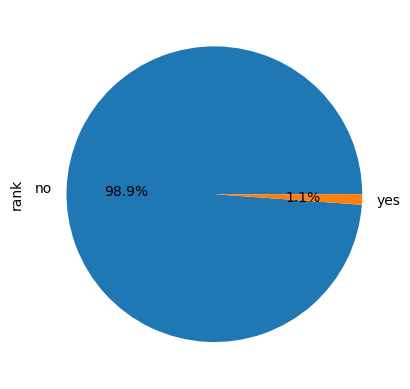

In [ ]:
df.groupby('founder_is_ceo').count()['rank'].plot(kind = 'pie', autopct = '%.1f%%')

It is observed that founder is not the CEO for approximately 99% of Fortune 500 companies.

<Axes: ylabel='rank'>

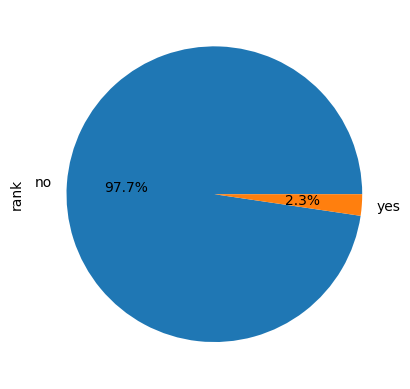

In [ ]:
df.groupby('female_ceo').count()['rank'].plot(kind = 'pie', autopct = '%.1f%%')

Less than 3% of the companies have female CEOs

In [ ]:
df.groupby('industry').mean()['rank'].sort_values()

<ipython-input-19-4d1c0567f904>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('industry').mean()['rank'].sort_values()


industry
Petroleum Refining                         127.857585
Mail, Package, and Freight Delivery        143.690141
Health Care: Insurance and Managed Care    147.583333
Semiconductors                             148.800000
Wholesalers: Health Care                   154.234783
                                              ...    
Textiles                                   415.272727
Transportation Equipment                   420.128205
Furniture                                  425.714286
Marine services                            457.000000
Education                                  459.000000
Name: rank, Length: 94, dtype: float64

Petroleum Refining industry ranks top among all the industries

In [ ]:
plt.figure(figsize=(120,50))
sns.barplot(x=df['sector'], y=df['profit_mil'])
plt.xticks(fontsize=45, rotation='vertical')
plt.yticks(fontsize=45)
plt.ylabel('profit_in_millions',fontsize=55)
plt.xlabel('sector',fontsize=50)

Text(0.5, 0, 'sector')

Technology sector has highest profit

<Axes: xlabel='headquarters_state'>

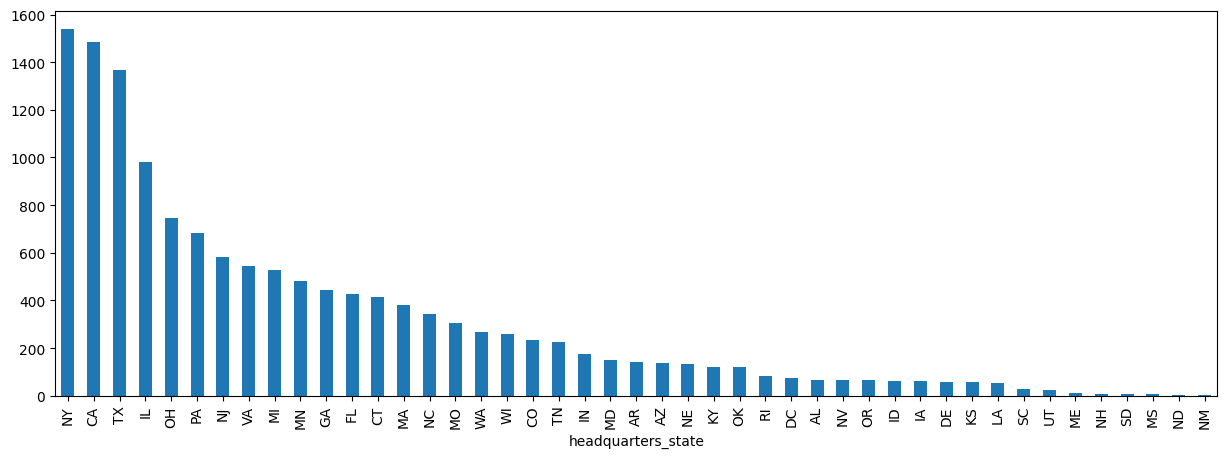

In [ ]:
df.groupby('headquarters_state').count()['revenue_mil'].sort_values(ascending = False).plot(kind = 'bar', figsize = [15,5])

New York, California, Texas has the highest revenue sources

<Axes: ylabel='global_500'>

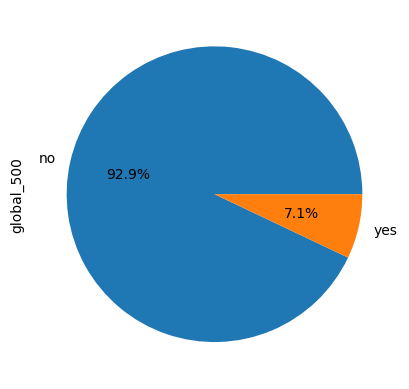

In [ ]:
df['global_500'].value_counts().plot(kind='pie',autopct='%.1f%%')

Only 7% of the Fortune 500 companies are in global 500

<Axes: ylabel='newcomer_to_fortune_500'>

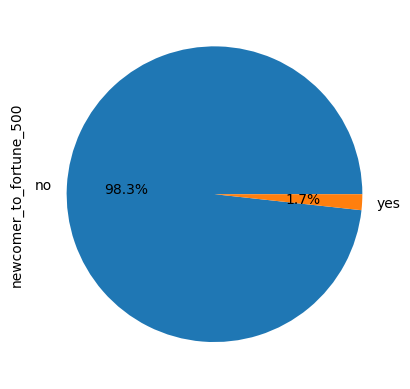

In [ ]:
df['newcomer_to_fortune_500'].value_counts().plot(kind='pie',autopct='%.1f%%')

Less than 2% companies are newly added to Fortune 500 list

<ipython-input-25-a12b46536d1a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('name').sum()['profit_mil'].nlargest(10).sort_values().plot(kind='barh')


Text(0.5, 1.0, 'Top 10 highest earning companies')

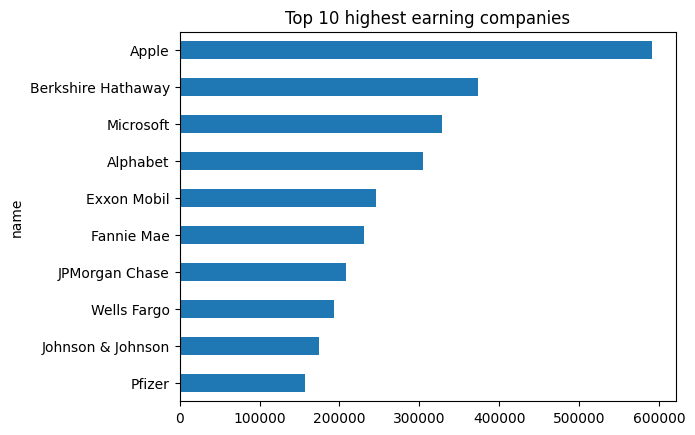

In [ ]:
df.groupby('name').sum()['profit_mil'].nlargest(10).sort_values().plot(kind='barh')
plt.title('Top 10 highest earning companies')

<ipython-input-26-1420f570e14d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('headquarters_state').sum()['asset_mil'].nlargest(10).sort_values().plot(kind='barh')


Text(0.5, 1.0, 'Top 10 states with highest asset value')

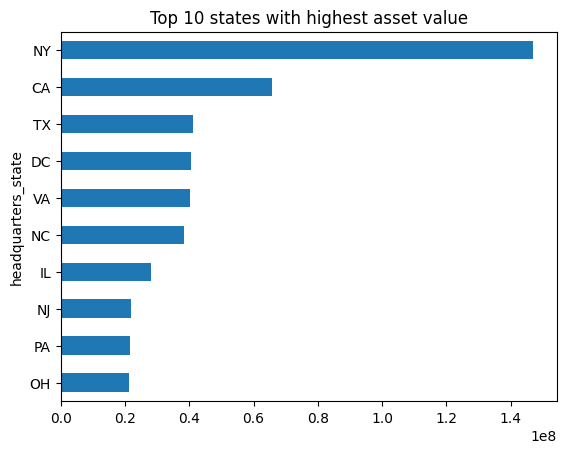

In [ ]:
df.groupby('headquarters_state').sum()['asset_mil'].nlargest(10).sort_values().plot(kind='barh')
plt.title('Top 10 states with highest asset value')

<ipython-input-27-c166b879f8df>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('headquarters_state').sum()['market_value_mil'].nlargest(10).sort_values().plot(kind='barh')


Text(0.5, 1.0, 'Top 10 states with highest market value')

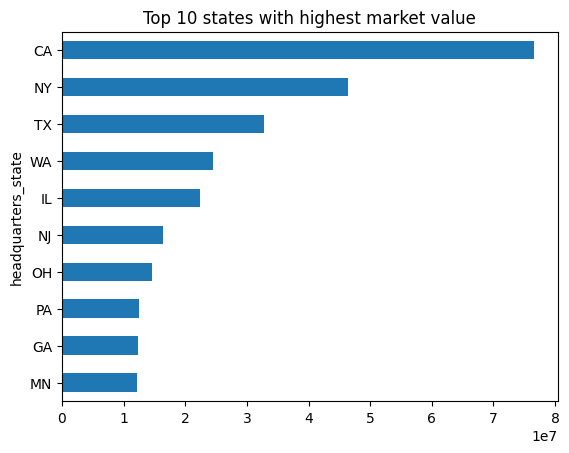

In [ ]:
df.groupby('headquarters_state').sum()['market_value_mil'].nlargest(10).sort_values().plot(kind='barh')
plt.title('Top 10 states with highest market value')

<ipython-input-28-2bbbce78419f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('name').sum()['employees'].nlargest(10).sort_values().plot(kind='barh')


Text(0.5, 1.0, 'Top 10 companies with highest no. of employees')

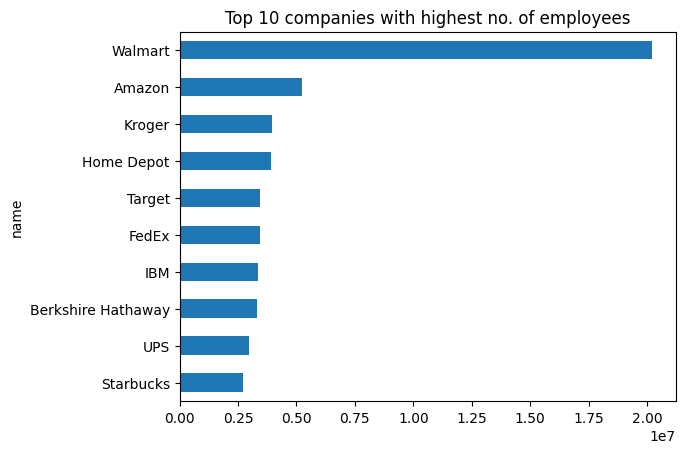

In [ ]:
df.groupby('name').sum()['employees'].nlargest(10).sort_values().plot(kind='barh')
plt.title('Top 10 companies with highest no. of employees')